<a href="https://colab.research.google.com/github/saudyusaf/data-science/blob/main/program15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

wine_data = pd.read_csv("/content/Wine_Quality.csv", sep=',')
print(wine_data.head())

# Apply one-hot encoding to the 'type' column
if 'type' in wine_data.columns:
    wine_data = pd.get_dummies(wine_data, columns=['type'], drop_first=True)


X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

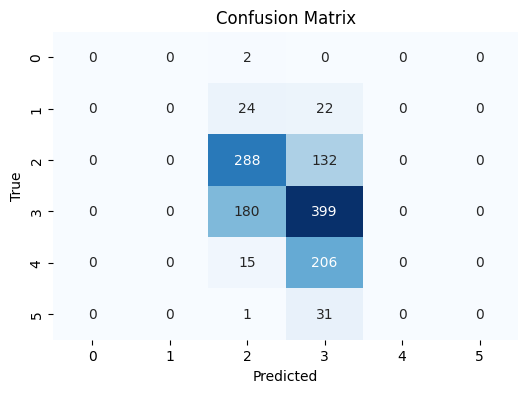

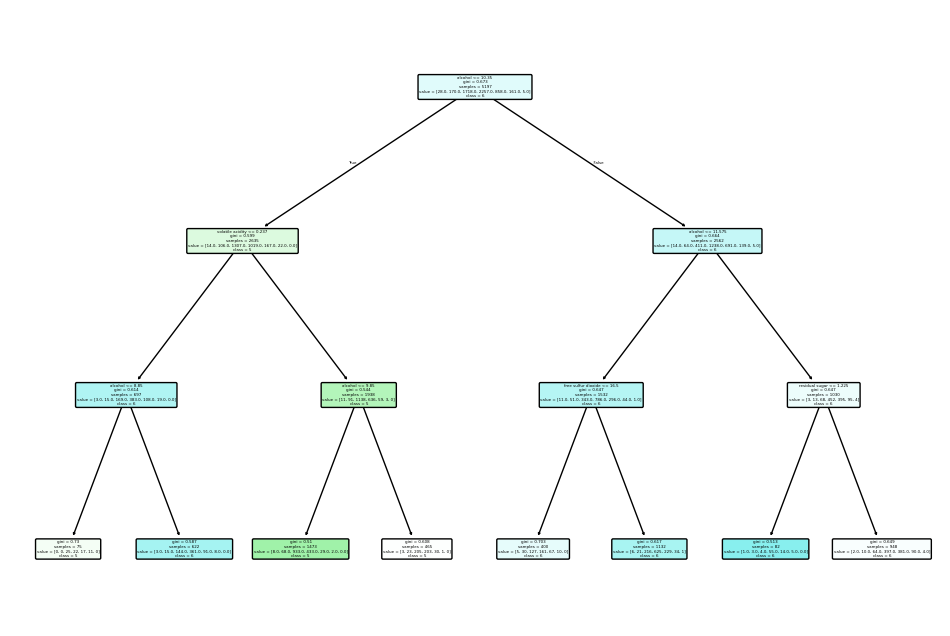

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = dt_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=
[str(label) for label in dt_classifier.classes_], filled=True, rounded=True)
plt.show()